In [32]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
tiles_path = '/home/yangz2/projects/1906-pcgml/pcgml-gmmVae-exp/data/tiles'

In [7]:
chars2pngs_smb = {    
    "-": Image.open(f'{tiles_path}/smb-background.png'),
    "X": Image.open(f'{tiles_path}/smb-unpassable.png'),
    "S": Image.open(f'{tiles_path}/smb-breakable.png'),
    "?": Image.open(f'{tiles_path}/smb-question.png'),
    "Q": Image.open(f'{tiles_path}/smb-question.png'),
    "o": Image.open(f'{tiles_path}/smb-coin.png'),
    "E": Image.open(f'{tiles_path}/smb-enemy.png'),
    "<": Image.open(f'{tiles_path}/smb-tube-top-left.png'),
    ">": Image.open(f'{tiles_path}/smb-tube-top-right.png'),
    "[": Image.open(f'{tiles_path}/smb-tube-lower-left.png'),
    "]": Image.open(f'{tiles_path}/smb-tube-lower-right.png'),
    "x": Image.open(f'{tiles_path}/smb-path.png'),  # self-created
    "Y": Image.open(f'{tiles_path}/Y.png'),  # self-created
    "N": Image.open(f'{tiles_path}/N.png'),  # self-created
    "B": Image.open(f'{tiles_path}/cannon_top.png'),
    "b": Image.open(f'{tiles_path}/cannon_bottom.png'), 
}


In [29]:
def char_array_to_image(array):
    """
    Convert a 16-by-16 array of integers into a PIL.Image object
    param: array: a 16-by-16 array of integers
    """
    image = Image.new('RGB',(array.shape[1] * 16, array.shape[0] * 16))
    for row, seg in enumerate(array):
        for col, char in enumerate(seg):
            image.paste(chars2pngs_smb[char], (col * 16, row * 16))
    return image

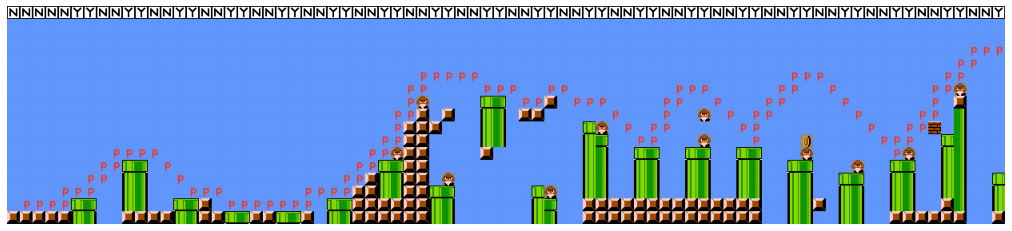

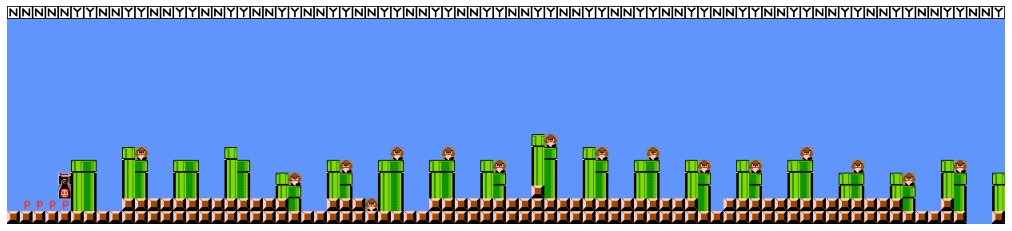

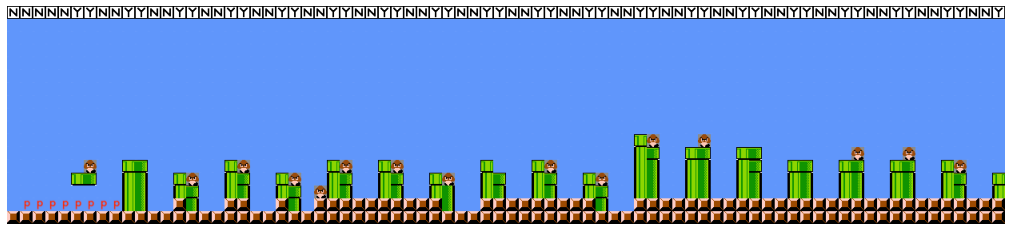

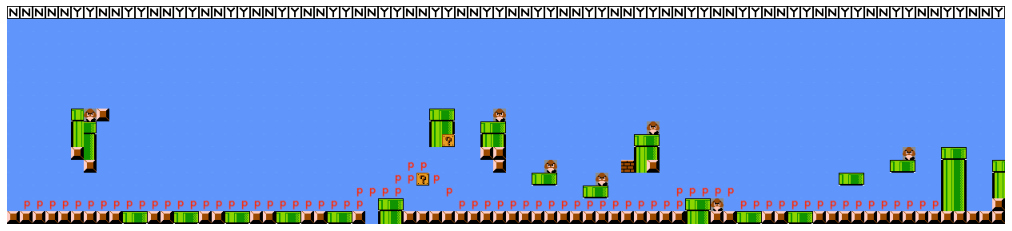

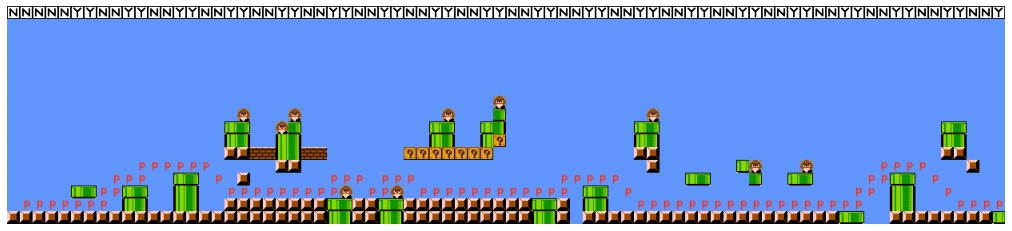

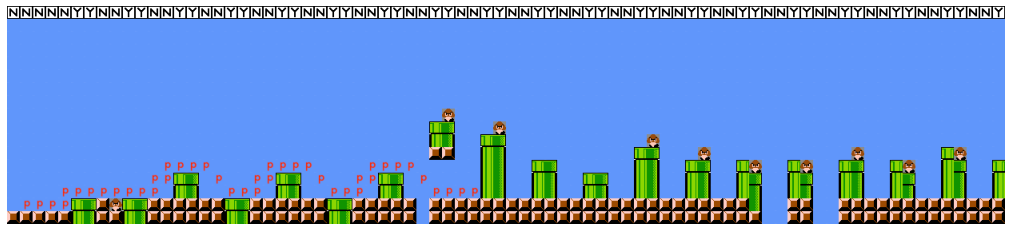

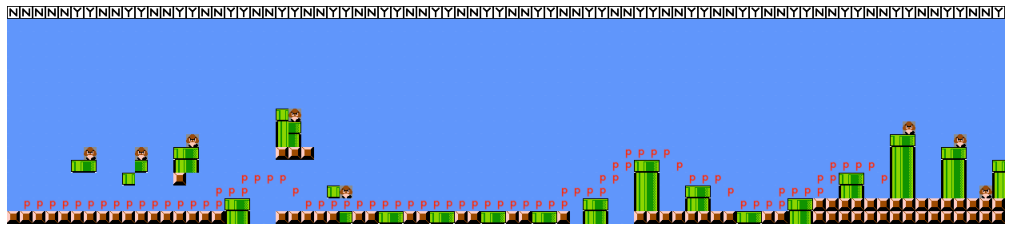

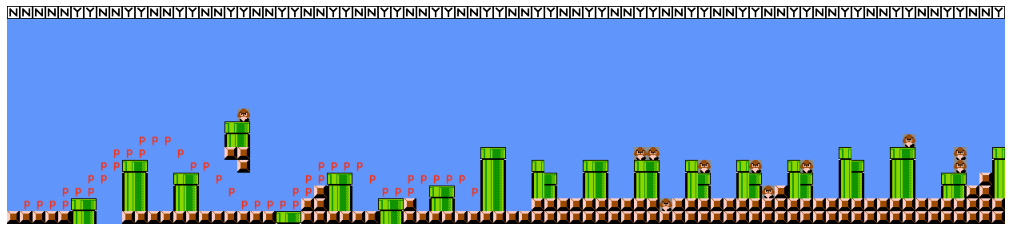

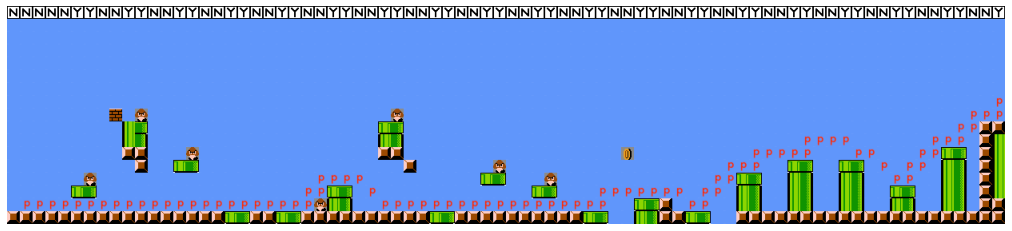

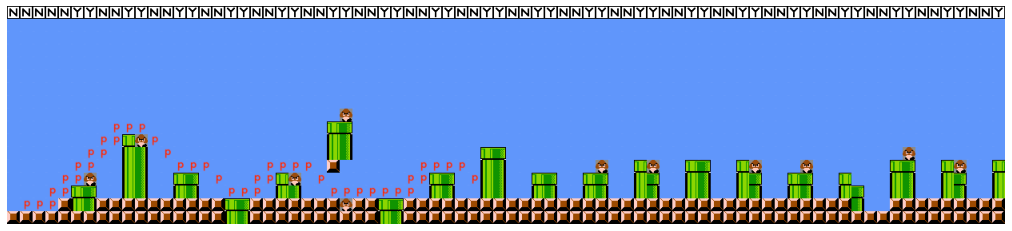

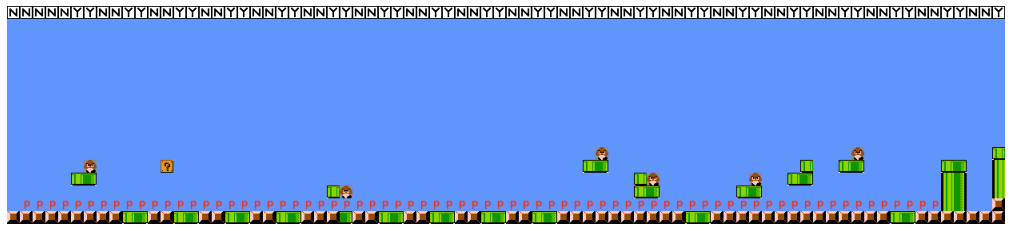

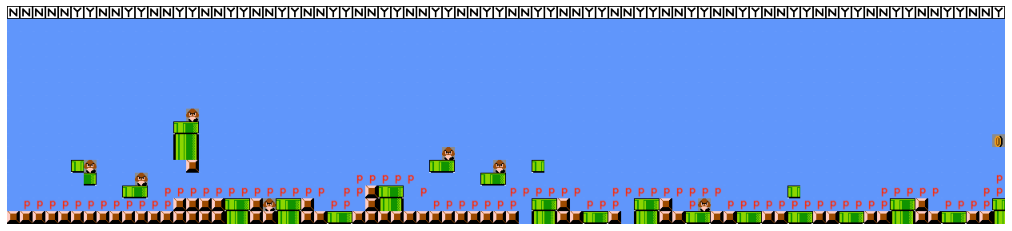

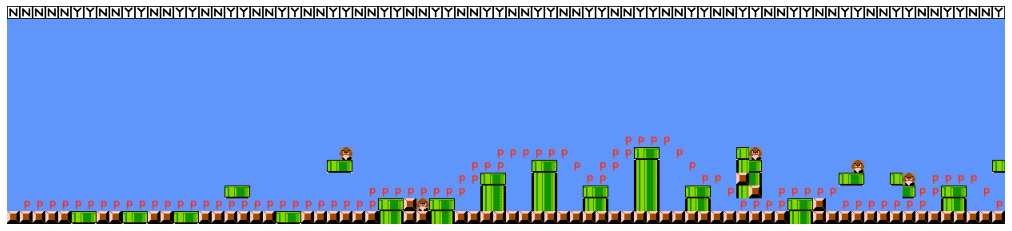

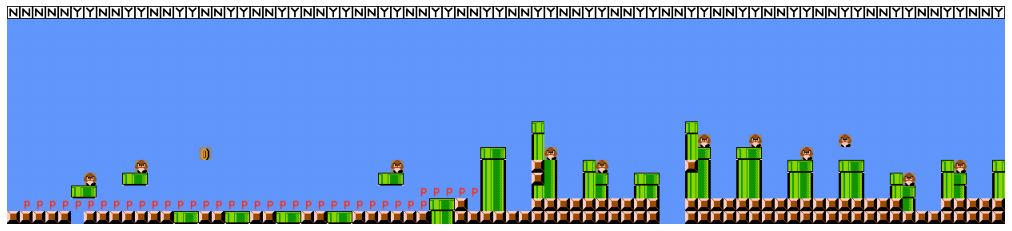

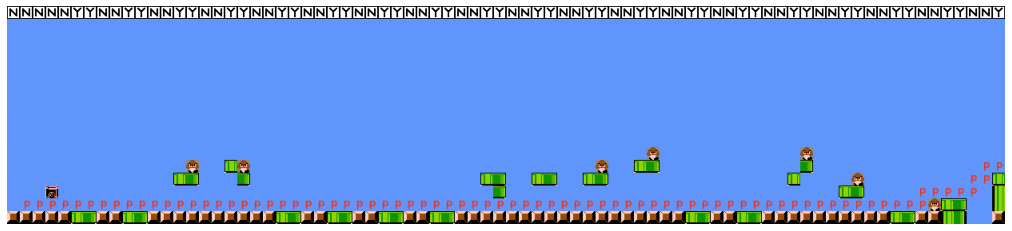

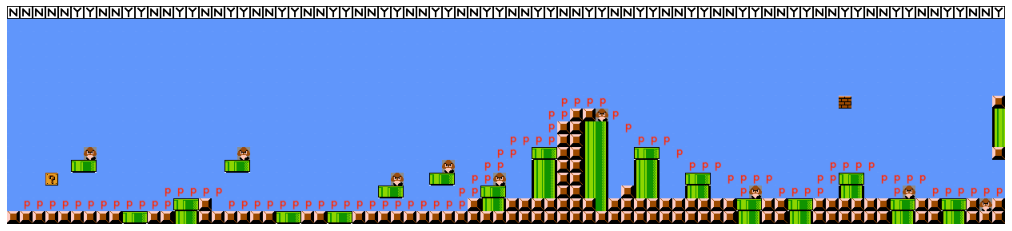

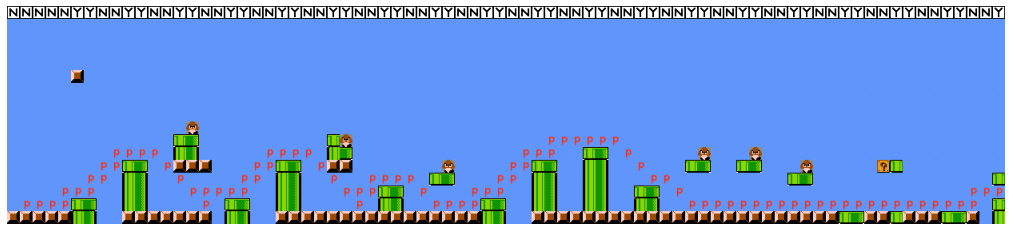

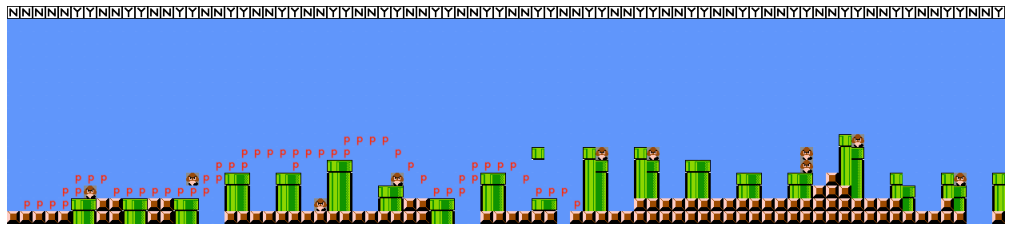

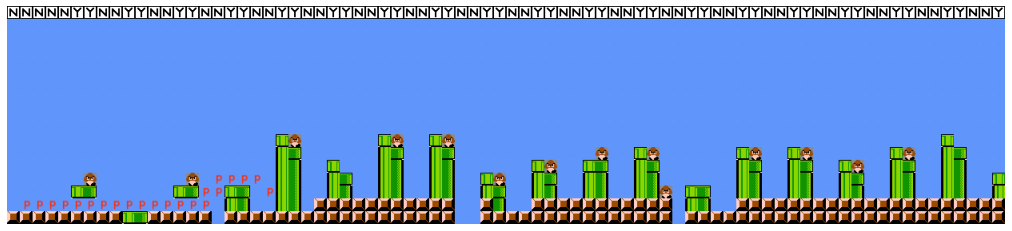

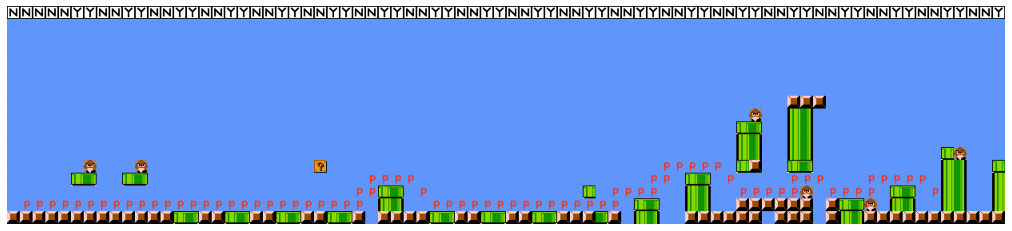

In [34]:
for i in range(1, 20+1, 1):
    with open(f'./lstm_conditional_generated_levels_txt/{i}.txt',  'r') as txt_f:
        infile = np.array([list(line.rstrip()) for line in txt_f.readlines()])
    plt.figure(figsize=(20, 4))
    plt.imshow(char_array_to_image(infile))
    plt.axis('off')
    plt.savefig(f'./lstm_conditional_generated_levels_png/{i}.png', dpi=150)